# Pymaceuticals Inc.
---

### Analysis

- Observation 1 is that Capumolin and Ramicane were more effective than the other two drugs that we looked at in the boxplot. Observation 2 is that in general, the more the mouse weights the higher the volume of the tumor. The third observation is that Capomulin was effective are reduing the volume of the tumor in the mouse l509.
 

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Challenges\module5-Challenge\Pymaceuticals\data\Mouse_metadata.csv")
study_results = pd.read_csv(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Challenges\module5-Challenge\Pymaceuticals\data\Study_results.csv")

# Combine the data into a single DataFrame
df = study_results.merge(mouse_metadata, how="inner", on = "Mouse ID")

# Display the data table for preview
df.head(20)
#df.sort_values(["Timepoint", "Mouse ID"], axis=0)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [138]:
# Checking the number of mice.
print(len(df["Mouse ID"].unique()))

249


In [139]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateList = []
for ID in list(df["Mouse ID"].unique()):
    df_ID = df[df["Mouse ID"] == ID]
    if len(df_ID) != len(df_ID["Timepoint"].unique()):
        duplicateList.append(ID)
        
duplicateList

#array(['g989'], dtype=object)

['g989']

In [140]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateID = "g989"
df[df["Mouse ID"] == duplicateID]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [141]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df["Mouse ID"] != duplicateID]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [142]:
# Checking the number of mice in the clean DataFrame.
len(df["Mouse ID"].unique())

248

## Summary Statistics

In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
newDF = df[["Drug Regimen", "Tumor Volume (mm3)"]]

meanSeries = newDF.groupby(["Drug Regimen"]).mean()
medianSeries = newDF.groupby(["Drug Regimen"]).median()
varSeries = newDF.groupby(["Drug Regimen"]).var()
stdSeries = newDF.groupby(["Drug Regimen"]).std()
semSeries = newDF.groupby(["Drug Regimen"]).sem()

summaryDF = pd.concat([meanSeries,medianSeries,varSeries,stdSeries,semSeries], axis=1)
summaryDF.columns =["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
summaryDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [144]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
newDF.groupby(["Drug Regimen"]).aggregate(func=["mean","median","var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

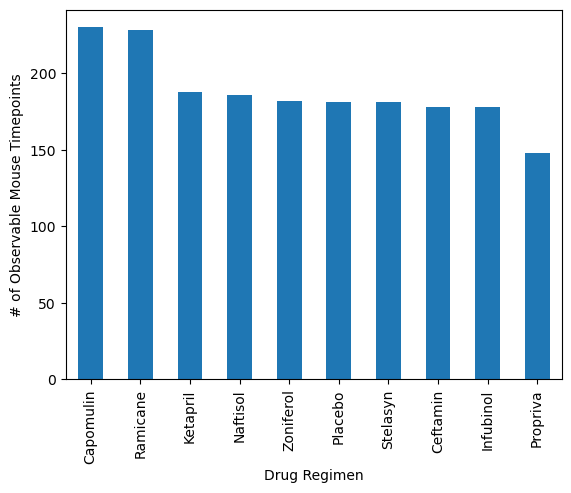

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plotDF = df[["Drug Regimen", "Timepoint"]]
plotDF = plotDF.groupby(["Drug Regimen"]).aggregate(func=["count"])
plotDF = plotDF.sort_values(by=plotDF.columns[0], ascending = False)
plotDF.plot.bar(legend=False)
plt.ylabel("# of Observable Mouse Timepoints")
plt.show()

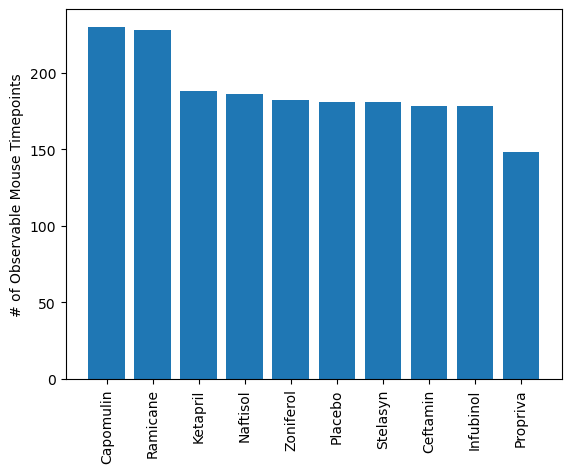

In [146]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x = plotDF.index, height = plotDF.iloc[:,0])
plt.xticks(rotation=90)
plt.ylabel("# of Observable Mouse Timepoints")
plt.show()

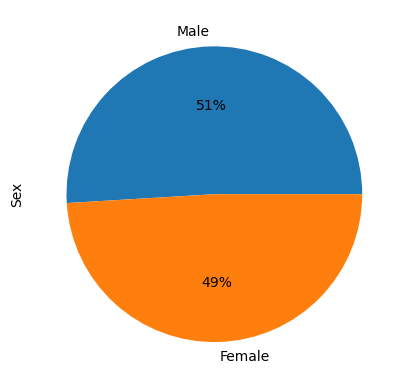

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderDF = df["Sex"].value_counts()
genderDF.plot(kind="pie", autopct='%1.0f%%')
plt.show()

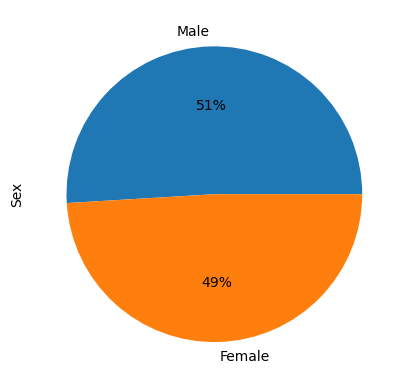

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderDF,labels=genderDF.index, autopct='%1.0f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [149]:
#####   Where I left off   ####

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumorDF = pd.DataFrame(columns=df.columns)

# Start by getting the last (greatest) timepoint for each mouse

for ID in list(df["Mouse ID"].unique()):
    df_ID = df[df["Mouse ID"] == ID]
    lastRow = df_ID.iloc[-1,:]
    tumorDF = tumorDF.append(lastRow,ignore_index=True)

tumorDF = tumorDF.sort_values('Drug Regimen')
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorDF.head()

C:\Users\nrhl1\AppData\Local\Temp\ipykernel_21520\3969975685.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumorDF = tumorDF.append(lastRow,ignore_index=True)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
225,r554,45,32.377357,3,Capomulin,Female,8,17
226,s185,45,23.343598,1,Capomulin,Female,3,17
227,b742,45,38.939633,0,Capomulin,Male,7,21
228,x401,45,28.484033,0,Capomulin,Female,16,15


In [158]:
# Put treatments into a list for for loop (and later for plot labels)

labelNames = []
dataList = []
selectDrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for drug in list(tumorDF["Drug Regimen"].unique()):
    if drug in selectDrugs:
        data = list(tumorDF[tumorDF["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
        dataList.append(data)
        labelNames.append(drug)
    else:
        pass
    

# Create empty list to fill with tumor vol data (for plotting)
for x in range(len(selectDrugs)):
    q1, q3 = np.percentile(dataList[x], [25,75])
    iqr = round(q3-q1,2)
    high = q3 + 1.5*iqr
    low = q1 - 1.5*iqr
    
    outliers = [outlier for outlier in dataList[x] if (outlier>high or outlier<low)]
    if len(outliers) == 1:
        word = "outlier"
    else:
        word = "outliers"
    print(f"IQR of {labelNames[x]} is {iqr} with {len(outliers)} {word}!")
 #   print(f"Number of Outliers in {labelNames[x]}: {len(outliers)}")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


IQR of Capomulin is 7.78 with 0 outliers!
IQR of Ceftamin is 15.58 with 0 outliers!
IQR of Infubinol is 11.48 with 1 outlier!
IQR of Ramicane is 9.1 with 0 outliers!


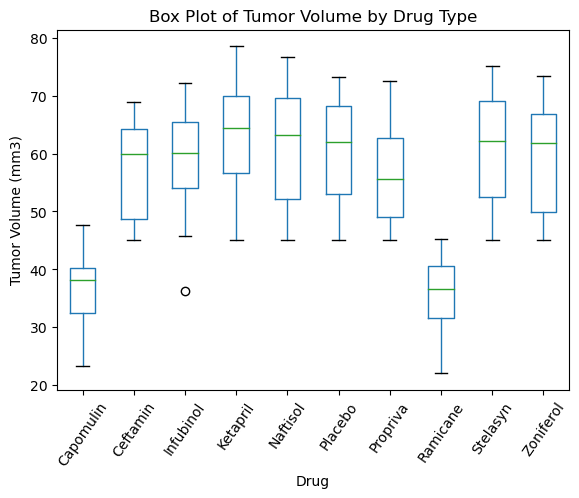

In [130]:
tumorDF.boxplot(column=["Tumor Volume (mm3)"], by = ["Drug Regimen"], rot=55, grid=False)
plt.title("Box Plot of Tumor Volume by Drug Type")
plt.suptitle('')
plt.xlabel("Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

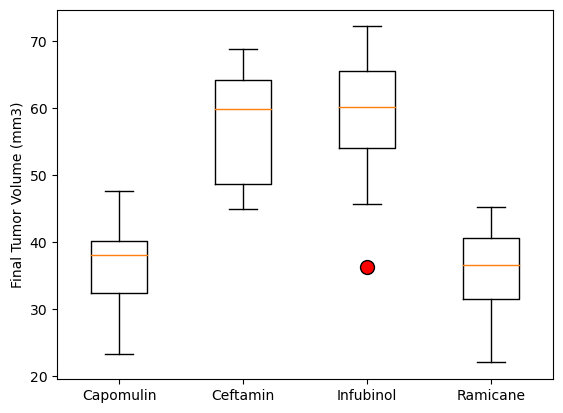

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(dataList, labels=labelNames, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

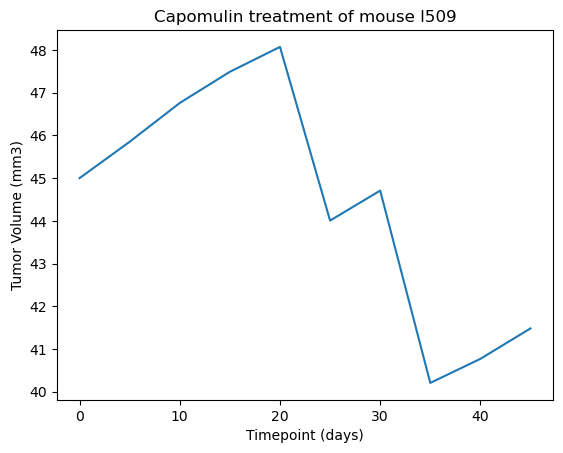

In [170]:


# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singleMouseID = "l509"
lineDF = df[df["Mouse ID"] == singleMouseID]
lineDF = lineDF[["Timepoint","Tumor Volume (mm3)"]]
lineDF.plot.line(x="Timepoint", y="Tumor Volume (mm3)", legend=False)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

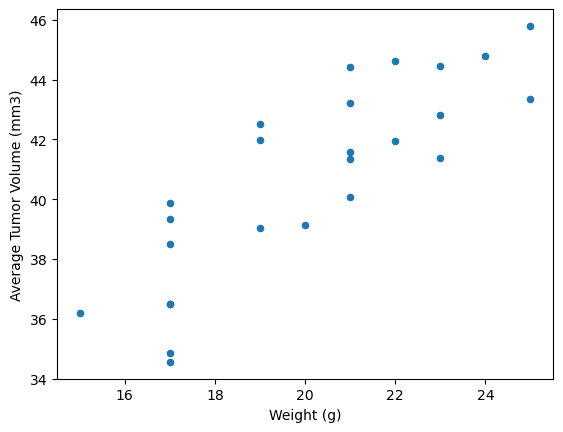

In [198]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drugChoice = "Capomulin"
scatterDF = df[df["Drug Regimen"] == drugChoice]
scatterDF = scatterDF[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
scatterDF = scatterDF.groupby("Mouse ID").mean()
scatterDF.plot.scatter(x="Weight (g)", y = "Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


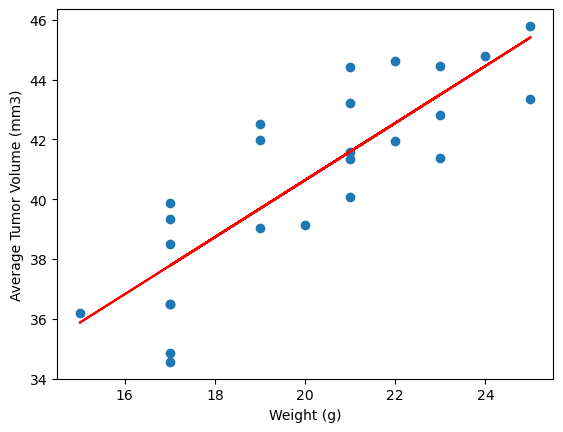

In [203]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corrDF = scatterDF.corr()

corr = round(corrDF.iloc[0,1],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

#Source for linear regression
#https://stackoverflow.com/questions/36420908/can-i-draw-a-regression-line-and-show-parameters-using-scatterplot-with-a-pandas
from sklearn.linear_model import LinearRegression

X = scatterDF["Weight (g)"].values.reshape(-1, 1)
Y = scatterDF["Tumor Volume (mm3)"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()